## Unit Tests 

In [1]:
import os
import sys

import cv2
import dlib
import numpy as np

from imutils import face_utils

In [2]:
sys.path.append("../")

%load_ext autoreload
%autoreload 10
import facelib
from facelib.transforms import FaceHaarDetectCrop, FaceAlign

In [3]:
# define model directory and paths
prototxt = '../models/deploy.prototxt'
caffeModel = '../models/res10_300x300_ssd_iter_140000.caffemodel'

faceLandmarkModel = "../models/shape_predictor_5_face_landmarks.dat"

In [4]:
# test sample data
daniel_path = "../data/raw/daniel/01_neutral.jpg"
together_path = "together.jpg"

### Face Detect Crop

In [5]:
detect_crop_single = FaceHaarDetectCrop(prototxt, caffeModel, multi_face=False)
detect_crop_multi = FaceHaarDetectCrop(prototxt, caffeModel, multi_face=True)

In [6]:
detect_crop_multi.imsize

(300, 300)

In [7]:
daniel = cv2.imread(daniel_path)
daniel_rect = detect_crop_single(daniel)

In [8]:
import matplotlib.pyplot as plt

In [9]:
together = cv2.imread(together_path)
rects = detect_crop_multi(together)

In [10]:
rects

[rectangle(211,26,497,387),
 rectangle(858,275,1039,489),
 rectangle(604,281,737,458),
 rectangle(1074,528,1275,719)]

In [11]:
def _crop_from_rect(image, rect):
    # single face mode where only one rectangle per image
    # rectangle here denote bounding box of a face in an image
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    face = image[y:y+h, x:x+w, :]
    return face

def _crop_from_rects(image, rects):
    # multi face mode where one image map to many rectangles
    # rectangle here denote bounding box of a face in an image
    faces = []
    for rect in rects:
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        face = image[y:y+h, x:x+w, :]
        faces.append(face)
    return faces

In [12]:
daniel_cropped = _crop_from_rect(daniel, daniel_rect)

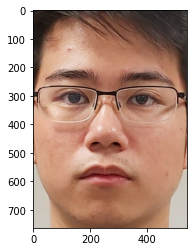

In [13]:
plt.imshow(daniel_cropped[:,:,::-1])

In [14]:
faces = _crop_from_rects(together, rects)

In [15]:
faces[0].shape

(361, 286, 3)

In [16]:
faces[-1].shape

(191, 201, 3)

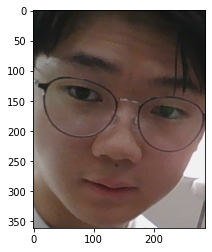

In [17]:
plt.imshow(faces[0][:,:,::-1])

### Face Align

In [24]:
face_landmark_model = "../models/shape_predictor_5_face_landmarks.dat"
align_face = FA(face_landmark_model=face_landmark_model)